# Practical 03 Data Similarity and Distance
In this pract we will be exploring the concepts of data similarity and data distance.

You only need to complete **Task 1 and Task 2** during the one-hour lab. The remaining task is highly recommended to be completed as self-practice after the lab.

# Task 1: Q3 from Chapter 3 of [Aggarwal](https://www.springer.com/gp/book/9783319141411)

We will be working with the [*Ionosphere*](http://archive.ics.uci.edu/ml/datasets/Ionosphere) data set from the UCI Machine Learning Repository.

1. Copy the file `ionosphere.data` into the collaboratory space.
    - Review the file `ionosphere.names` if you want some context for the data
2. Compute the $L_p$ distances between all pairs of the first 10 data points, for p = 1, 2, and $\infty$
3. Compute the contrast measure on the data set for each norm.
    - Repeat the exercise after samling the first $r$ dimensions, where $r$ varies from 1 to the full dimensionality of the data.
    - Make a plot of contrast vs $r$, compare to figure 3.1 (a) of Aggarwal.

## Distance Contrast in High Dimensions (Q3 from Aggarwal)

In this exercise, you will explore how various \( $L_p$ \) distance metrics behave as the number of dimensions increases. This experiment is inspired by **Question 3 from Chapter 3** of Aggarwal's *Data Mining: The Textbook*.

You will work with the [**Ionosphere dataset**](http://archive.ics.uci.edu/ml/datasets/Ionosphere) from the UCI Machine Learning Repository to:

1. **Load the Dataset**  
    - Use the file `ionosphere.csv`, which contains 34 numeric attributes and a label.
    - Ignore the label column and focus only on the numeric features.
2. **Compute Pairwise Distances**  
    - Extract the **first 10 data points**.
    - Compute pairwise distances for the following norms:
        - \( $L_1$ \): Manhattan Distance  
        - \( $L_2$ \): Euclidean Distance  
        - \( L$\infty$ \): Chebyshev Distance  
3. **Visualize the Distance Matrices**  
    - Create heatmaps for each distance matrix to visually compare them.

# Step 1: Load the Ionosphere Dataset

We will begin by working with the `ionosphere.data` file. Although the original file from the UCI repository is named `ionosphere.data`, it is actually formatted as a **comma-separated values (CSV)** file. To make it compatible with Python data tools, we will save and refer to it as `ionosphere.csv`.

**You can obtain this .csv file:**
- Download `ionosphere.csv` from the **Blackboard > Lab03** section and place it in your working directory.

In [7]:
import pandas as pd
import numpy as np

# Load the dataset
# Note: 'ionosphere.csv' has no header row, so we explicitly set header=None
all_data = pd.read_csv('ionosphere.csv', header=None)

# Show the shape of the dataset (rows, columns)
print("Dataset shape (rows, columns):", all_data.shape)

# Preview the first 5 rows of the dataset to understand its structure
all_data.head()

Dataset shape (rows, columns): (351, 35)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


## Dataset Overview: Ionosphere Radar Signals

The dataset we are using is derived from radar signal returns collected from the ionosphere.

### Dataset Details
- **Number of instances**: 351
- **Number of attributes**: 35
  - **34 numeric features**: These represent radar signal measurements at different frequencies and return times.
  - **1 class label** (last column):
    - `'g'` – Good radar return (signal passes through the ionosphere)
    - `'b'` – Bad radar return (signal gets reflected or absorbed)

### Notes
- The data has **no header row**, so column indices range from `0` to `34`.
- The class label in column `34` is categorical and should be excluded when calculating numerical similarity or distance.

# Step 2: Compute $L_p$ Distances

In this step, we will compute the pairwise distances between the **first 10 data points** in the dataset using three common $L_p$ norms:

- $L_1$ (Manhattan distance)
- $L_2$ (Euclidean distance)
- $L_\infty$ (Chebyshev distance)

> **Important**:  
The final column (column index 34) is a **class label**—either `'g'` (good) or `'b'` (bad)—and is **categorical**.  
We must **exclude this column** when computing distance measures to ensure only numerical attributes are considered.

We will use `scipy.spatial.distance.pdist()` and `squareform()` to compute and visualize these distances in matrix form.


In [8]:
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Drop the class label column (last column) to retain only numerical features
X = all_data.iloc[:, :-1]

# Select the first 10 rows for distance calculation
X_subset = X.iloc[:10, :]

# Confirm shape and preview subset
print("Selected data shape:", X_subset.shape)
X_subset.head()

Selected data shape: (10, 34)


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [10]:
# Define custom distance functions for Lp norms

def l1(first_row, second_row):
    """
    Compute the L1 (Manhattan) distance between two vectors.
    Formula: L1(x, y) = Σ |x_i - y_i|
    """
    # Write Your Code


def l2(first_row, second_row):
    """
    Compute the L2 (Euclidean) distance between two vectors.
    Formula: L2(x, y) = sqrt(Σ (x_i - y_i)^2)
    """
    # Write Your Code

def linf(first_row, second_row):
    """
    Compute the L∞ (Chebyshev) distance between two vectors.
    Formula: L∞(x, y) = max |x_i - y_i|
    """
    # Write Your Code

# Helper function to compute a full pairwise distance matrix using a custom distance function
def pairwise_distance_matrix(data, distance_fn):
    """
    Compute the pairwise distance matrix for a given dataset using a user-defined distance function.
    
    Parameters:
    - data: A 2D NumPy array or DataFrame (rows = instances, columns = features)
    - distance_fn: A function that takes two 1D vectors (rows) and returns a distance (e.g., L1, L2, L∞)

    Returns:
    - A square NumPy array (n x n) where element (i, j) is the distance between instance i and j
    """
    n = data.shape[0]  # Number of data points
    dist_matrix = np.zeros((n, n))  # Initialize an n × n distance matrix with zeros

    # Loop over all pairs of data points
    for i in range(n):
        for j in range(n):
            # Compute and store the distance between instance i and instance j
            dist_matrix[i, j] = distance_fn(data[i], data[j])

    return dist_matrix  # Return the completed distance matrix

# Step 3: Visualizing Pairwise Distance Matrices

In this step, we compute and visualize the **pairwise distance matrices** for the first 10 instances of the Ionosphere dataset using our custom implementations of three common $L_p$ norms.

Each distance matrix is displayed as a **heatmap**, where:
- Rows and columns correspond to instance indices (from 0 to 9).
- Cell $(i, j)$ shows the distance between instance $i$ and instance $j$ using the selected norm.
- Darker shades represent smaller distances (more similar), and lighter shades indicate larger distances (more dissimilar).

These visualizations help us understand how each distance norm captures similarity in different ways.

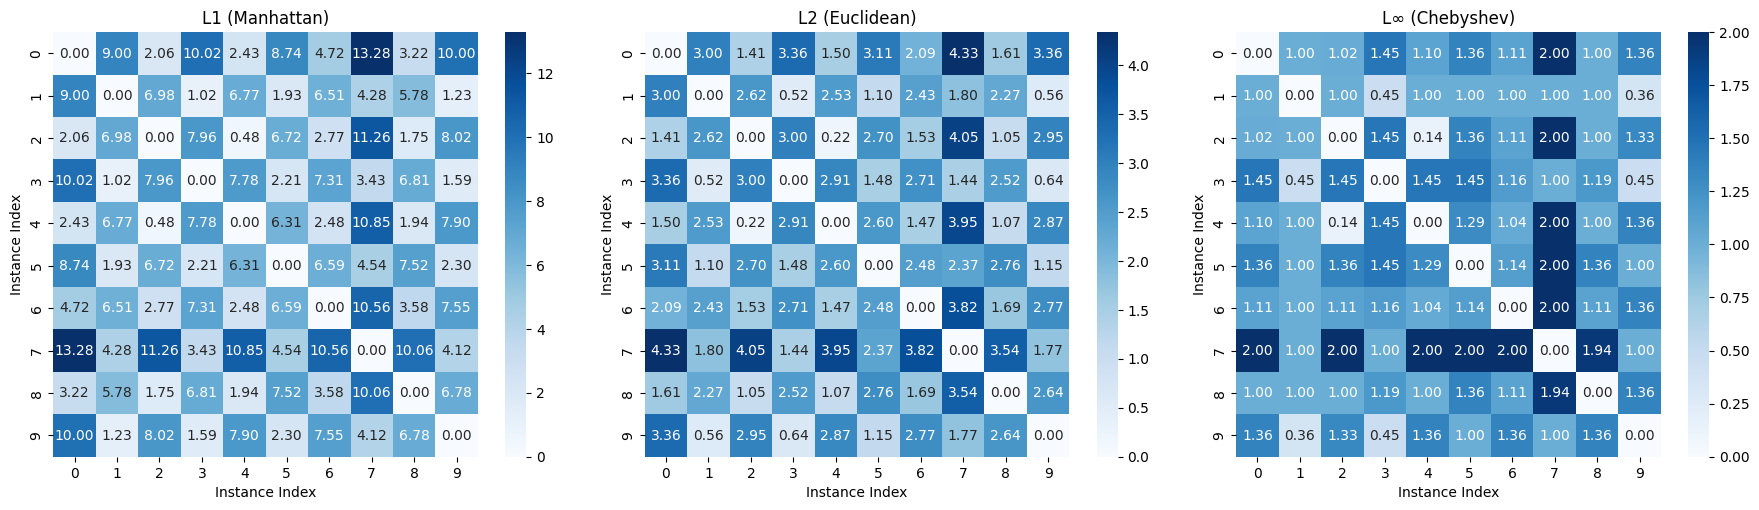

In [11]:
# Compute the distance matrices
dist_L1_custom = pairwise_distance_matrix(X_subset, l1)
dist_L2_custom = pairwise_distance_matrix(X_subset, l2)
dist_Linf_custom = pairwise_distance_matrix(X_subset, linf)

# Visualize using heatmaps
plt.figure(figsize=(18, 5))
for i, (mat, title) in enumerate(zip(
    [dist_L1_custom, dist_L2_custom, dist_Linf_custom],
    ['L1 (Manhattan)', 'L2 (Euclidean)', 'L∞ (Chebyshev)']
), 1):
    plt.subplot(1, 3, i)
    sns.heatmap(mat, annot=True, cmap='Blues', fmt=".2f", square=True)
    plt.title(title)
    plt.xlabel("Instance Index")
    plt.ylabel("Instance Index")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Visualizing Custom Pairwise Distance Matrices (First 10 Instances)
Each heatmap is a 10×10 symmetric matrix, where entry (i, j) represents the distance between instance *i* and instance *j* using the selected norm.
1. **L₁ – Left Heatmap**
    - Some distances exceed 13, indicating large cumulative deviation across features.
    - Instance 0 and 7 show the highest dissimilarity (~13.28).
2. **L₂ – Middle Heatmap**
    - Most distances fall between 2.0 and 4.3.
    - Lower than L₁ because square-rooting reduces the impact of larger deviations.
3. **L∞ – Right Heatmap**
    - Values are tightly bounded between 0.14 and 2.00.
    - Helpful for detecting outlier dimensions or max deviation limits.

# Task 2: Q6 from Chapter 3 of [Aggarwal](https://www.springer.com/gp/book/9783319141411)

In this task, we will explore similarity measures for **categorical data** using the **KDD Cup 1999** dataset. This question is based on Q6 from Chapter 3 of *Data Mining: The Textbook* by Charu C. Aggarwal.


### Dataset
We will use the `kddcup99.arff` file, which contains network connection records with both numerical and categorical attributes. You can download this file from **Blackboard → Lab → Lab 03**

### Task Instructions
1. **Load the dataset**  
    - Download and load the `kddcup99.arff` file into a Pandas DataFrame.
    - Use `scipy.io.arff` to parse `.arff` format if needed.
2. **Filter Categorical Attributes**  
    - Remove all **numerical columns**, keeping only the **categorical attributes**.
3. **Remove Duplicate Rows**  
    - Drop duplicate instances to ensure unique comparisons.
4. **Compute Similarities**  
    - Randomly select one data point (row).
    - Compute its similarity to all other rows using the following **categorical similarity measures**:
        - **Inverse Occurrence Frequency (IOF)**:  
            - Assign higher similarity weight to **rare attribute matches**.
        - **Overlap Measure**:  
            - Simple count of matching attribute values.
5. **Find the Nearest Neighbour**  
    - Identify the row with the **highest similarity** to the selected data point under each metric.
    - Optionally: compare and discuss how the two similarity measures differ in behavior.

### Goal
This task helps illustrate:
- How categorical similarity can be computed without converting to numeric format.
- The effect of frequency weighting on similarity comparisons.

# Step 1: Load the data
We did this exactly last week so just copy across

In [8]:
import pandas as pd
import numpy as np
from scipy.io import arff
import random

# Load the dataset
data, meta = arff.loadarff('kddcup99.arff')
df = pd.DataFrame(data)

### Converting Byte Columns to Strings

When loading the `.arff` file using `scipy.io.arff`, all **categorical attributes** are loaded as **byte strings** (e.g., `b'tcp'`, `b'http'`) instead of regular Python strings.

To ensure accurate and meaningful comparison of categorical values, we must decode these byte strings into standard UTF-8 strings.

The following loop iterates over all columns and decodes any byte-type entries:


In [9]:
# Convert byte columns to string (for categorical comparison)
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.decode('utf-8')

The following comparison illustrates how the dataset appears before and after converting byte strings to readable UTF-8 strings.

In [10]:
# Reload data for demonstration
from scipy.io import arff
raw_data, _ = arff.loadarff("kddcup99.arff")
raw_df = pd.DataFrame(raw_data)

# Show first 3 rows before decoding (byte format)
print("Before decoding (byte strings):")
display(raw_df.iloc[:3, :5])  # first 5 columns for brevity

# Decode byte strings to UTF-8
decoded_df = raw_df.copy()
for col in decoded_df.columns:
    if decoded_df[col].dtype == object:
        decoded_df[col] = decoded_df[col].str.decode('utf-8')

# Show first 3 rows after decoding
print("After decoding (UTF-8 strings):")
display(decoded_df.iloc[:3, :5])


Before decoding (byte strings):


,duration,protocol_type,service,flag,src_bytes
0,0.0,b'icmp',b'ecr_i',b'SF',1032.0
1,0.0,b'icmp',b'ecr_i',b'SF',1032.0
2,0.0,b'icmp',b'ecr_i',b'SF',1032.0


After decoding (UTF-8 strings):


,duration,protocol_type,service,flag,src_bytes
0,0.0,icmp,ecr_i,SF,1032.0
1,0.0,icmp,ecr_i,SF,1032.0
2,0.0,icmp,ecr_i,SF,1032.0


# Step 2: Selecting Categorical Attributes

The dataset contains a mix of **numerical** and **categorical** attributes. Since we are interested in applying **categorical similarity measures**, we must filter out the numerical columns.

The following code selects only the columns with data type `'object'`, which in this case corresponds to the **categorical features** (e.g., `protocol_type`, `service`, `flag`):

In [11]:
# Keep only categorical attributes (object or category types)
categorical_df = df.select_dtypes(include=['object'])

# Step 3: Removing Duplicate Rows

To ensure meaningful similarity computations, we remove any duplicate records from the categorical dataset.

In [12]:
# Remove duplicate rows
categorical_df = categorical_df.drop_duplicates().reset_index(drop=True)

print("Shape after filtering:", categorical_df.shape)

Shape after filtering: (119, 8)


# Step 4: Defining Similarity Measures for Categorical Data

To compare categorical records, we define two common similarity functions:


#### 1. Inverse Occurrence Frequency (IOF) Similarity

This measure assigns **higher similarity weight to rare attribute matches**. It is based on the idea that matching on **infrequent values** provides more meaningful similarity than matching on common values.

#### 2. Overlap Similarity

This is a simple and intuitive similarity measure: it counts the number of attributes for which the values in two rows are identical.

In [13]:
# Define similarity measures
def inverse_occurrence_frequency(row1, row2, df):
    """
    Inverse Occurrence Frequency Similarity:
    Give more weight to rare matches across attributes.
    """
    # Write Your Code

def overlap_measure(row1, row2):
    """
    Overlap Similarity:
    Count of matching attribute values.
    """
   # Write Your Code

# Step 5: Compute Similarity to a Randomly Selected Data Point

In this step, we evaluate how similar every data point in the dataset is to a randomly chosen reference row, using both:

- **Inverse Occurrence Frequency (IOF) Similarity**
- **Overlap Similarity**

#### Process:

1. **Random Selection**  
A single row is selected randomly from the dataset as the **query**.
2. **Similarity Calculation**  
    - For each remaining row in the dataset:
        - Compute the similarity to the query using both IOF and Overlap.
        - Skip comparing the query to itself (assign similarity = -1).

In [14]:
# Pick a random row and compute similarity

# Randomly select one row from the dataset to act as the "query" instance
query_idx = random.randint(0, len(categorical_df) - 1)
query_row = categorical_df.iloc[query_idx]

# Prepare empty lists to store similarity scores for each row
iof_scores = []        # Inverse Occurrence Frequency scores
overlap_scores = []    # Overlap similarity scores

# Iterate through every row in the dataset
for idx, row in categorical_df.iterrows():
    
    # Skip the query row itself — we don’t compare a row to itself
    if idx == query_idx:
        iof_scores.append(-1)        # Use -1 so it won’t be chosen as the nearest neighbour
        overlap_scores.append(-1)
        continue

    # Compute similarity between the query row and this row
    # 1. IOF: more weight to rare matches
    iof_scores.append(inverse_occurrence_frequency(query_row, row, categorical_df))
    
    # 2. Overlap: count of matching attribute values
    overlap_scores.append(overlap_measure(query_row, row))

# Step 6: Identify Nearest Neighbours

Using the similarity scores computed in Step 5, we now identify the most similar row (i.e., the **nearest neighbour**) to the randomly selected query row under each similarity metric:

In [15]:
# Identify nearest neighbours
nearest_iof_idx = np.argmax(iof_scores)
nearest_overlap_idx = np.argmax(overlap_scores)

print("\nQuery index:", query_idx)
print("Nearest neighbour by IOF similarity:", nearest_iof_idx)
print("Nearest neighbour by Overlap similarity:", nearest_overlap_idx)


Query index: 113
Nearest neighbour by IOF similarity: 5
Nearest neighbour by Overlap similarity: 5


# Task 3: Time Series Distance Calculation

This task explores similarity and distance computation for **time series data** using common distance metrics, both before and after normalization.


### 1. Load and Visualize
- Load the `timeseries.csv` file.
- Each row corresponds to a different sensor's time series.
- Plot the time series to understand their behavior visually.

---

### 2. Compute Pairwise Distances (Raw Data)
Compute the pairwise distances between time series using the following norms:
- **L1 norm** 
- **L2 norm** 
- **L∞ norm** 

### 3. Normalize the Time Series
Normalize each time series using **z-score normalization**

### 4. Compute Pairwise Distances (Normalized Data)
Recompute the L1, L2, and L∞ distances using the **normalized time series**.

### Objective:
- Understand how different distance metrics behave.
- See how normalization influences similarity comparisons.
- Compare rankings of similarity before and after normalization.

# Step 1: Load and Visualize Time Series Data

We begin by loading the `timeseries.csv` file, which contains three time series (Sensor1, Sensor2, Sensor3), each spanning 100 time steps. The CSV is transposed, so each row corresponds to a sensor and each column to a time step.

### Key Operations:
- Load the file into a Pandas DataFrame with no headers.
- Extract sensor labels (row names) and numeric time series values.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file without headers
df = pd.read_csv("timeseries.csv", header=None)

# Drop the first row (which contains time step values) and reset the row index
df_clean = df.drop(index=0).reset_index(drop=True)

# Extract sensor labels from the first column (e.g., "Sensor1", "Sensor2", ...)
sensor_labels = df_clean.iloc[:, 0].values  # These will be used for legend labels

# Extract time series data: all columns from the 2nd one onward (skip sensor label columns)
time_series = df_clean.iloc[:, 1:].astype(float).values  # Convert to float for plotting and calculations

time_steps = df.iloc[0, 1:].astype(float).values  # Used as x-axis values for plotting

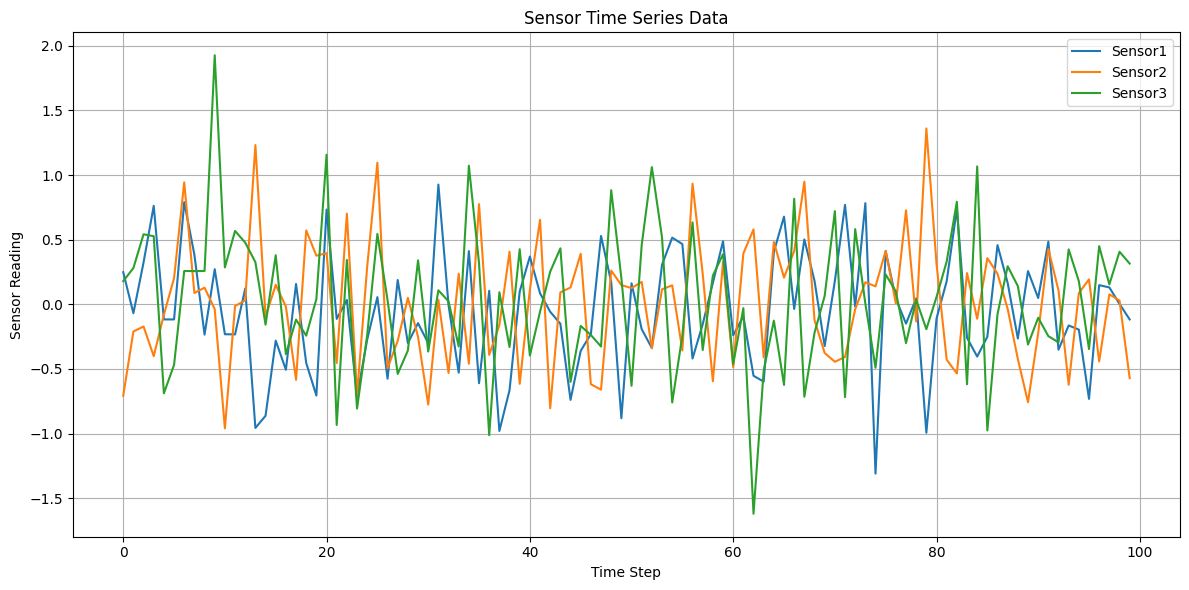

In [3]:
# Plot
plt.figure(figsize=(12, 6))
for i, label in enumerate(sensor_labels):
    plt.plot(time_steps, time_series[i], label=label)

plt.title("Sensor Time Series Data")
plt.xlabel("Time Step")
plt.ylabel("Sensor Reading")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Compute Pairwise Distances

We use functions from the [`scikit-learn`](https://scikit-learn.org/) library, one of the most widely-used open-source Python libraries for machine learning and data mining. It provides simple and efficient tools for:

- Data preprocessing (e.g., scaling, normalization)
- Distance and similarity measurements
- Model selection
- Classification and clustering

In this step, we use:

- `StandardScaler` for **z-score normalization**
- `MinMaxScaler` for **min-max normalization**
- `pairwise_distances` from `sklearn.metrics` to compute L1, L2, and L∞ distances between sensor time series

The outputs will be organized into structured DataFrames for downstream analysis and visualization.

In [7]:
from sklearn.metrics import pairwise_distances

def compute_pairwise_metrics(data, sensor_labels):
    """Compute L1, L2, and L∞ distances and return a long-form DataFrame"""
    dist_l1 = pairwise_distances(data, metric="manhattan")   # L1
    dist_l2 = pairwise_distances(data, metric="euclidean")   # L2
    dist_linf = pairwise_distances(data, metric="chebyshev") # L∞

    n = len(sensor_labels)
    records = []
    for i in range(n):
        for j in range(i + 1, n):
            records.append({
                "Sensor A": sensor_labels[i],
                "Sensor B": sensor_labels[j],
                "L1": dist_l1[i, j],
                "L2": dist_l2[i, j],
                "L∞": dist_linf[i, j]
            })
    return pd.DataFrame(records)

distances = compute_pairwise_metrics(time_series, sensor_labels)
print(distances)

  Sensor A Sensor B         L1        L2        L∞
0  Sensor1  Sensor2  54.617017  7.012081  2.353869
1  Sensor1  Sensor3  50.687823  6.396919  1.655086
2  Sensor2  Sensor3  59.619429  7.316278  2.199931


# Step 3: Normalize the Time Series Data

Normalization is a key step in similarity analysis to remove biases due to differences in offset, scale, or variance between sensors. In this step, we apply two normalization techniques to each sensor's time series:

---

### Z-Score Standardization

This method standardizes each time series so that:
- Mean = 0
- Standard deviation = 1

Z-score normalization helps when the focus is on the shape or pattern rather than the magnitude of values.

### Min-Max Normalization

This method rescales each time series to a range of [0, 1], preserving the shape but adjusting the scale. You can refer to **Lecture 2** slides for the detailed formula.

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# --- Raw distances ---
original_distances = compute_pairwise_metrics(time_series, sensor_labels)

# --- Z-Score Normalization (Row-wise) ---
zscore_data = StandardScaler().fit_transform(time_series.T).T
zscore_distances = compute_pairwise_metrics(zscore_data, sensor_labels)

# --- Min-Max Normalization (Row-wise) ---
minmax_data = MinMaxScaler().fit_transform(time_series.T).T
minmax_distances = compute_pairwise_metrics(minmax_data, sensor_labels)

# --- Combine all into comparison DataFrame ---
comparison_df = original_distances[["Sensor A", "Sensor B"]].copy()
comparison_df["L1 (raw)"] = original_distances["L1"]
comparison_df["L2 (raw)"] = original_distances["L2"]
comparison_df["L∞ (raw)"] = original_distances["L∞"]
comparison_df["L1 (z-score)"] = zscore_distances["L1"]
comparison_df["L2 (z-score)"] = zscore_distances["L2"]
comparison_df["L∞ (z-score)"] = zscore_distances["L∞"]
comparison_df["L1 (min-max)"] = minmax_distances["L1"]
comparison_df["L2 (min-max)"] = minmax_distances["L2"]
comparison_df["L∞ (min-max)"] = minmax_distances["L∞"]

print(comparison_df.head())

  Sensor A Sensor B   L1 (raw)  L2 (raw)  L∞ (raw)  L1 (z-score)  \
0  Sensor1  Sensor2  54.617017  7.012081  2.353869    119.154979   
1  Sensor1  Sensor3  50.687823  6.396919  1.655086     99.645528   
2  Sensor2  Sensor3  59.619429  7.316278  2.199931    117.121541   

   L2 (z-score)  L∞ (z-score)  L1 (min-max)  L2 (min-max)  L∞ (min-max)  
0     15.075956      4.927832     27.771764      3.387123      0.858638  
1     12.721321      3.208089     19.090266      2.480859      0.675234  
2     14.398832      4.262029     21.658912      2.636566      0.663377  
